# **<span style="color: RED;">THỰC HÀNH 3: BIẾN ĐỔI HÌNH HỌC</span>**

## **<span style="color: RED;">1: VIẾT CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH</span>**

#### 1.1 Chọn đối tượng trong ảnh

(1427, 2100, 3)


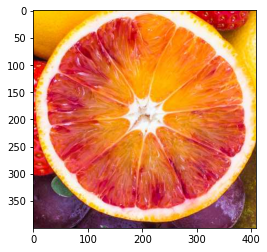

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()


#### 1.2 Tịnh tiến đơn

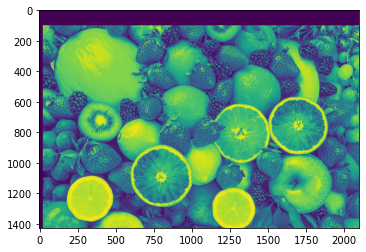

In [4]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode = "F")
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()


#### 1.3 Thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


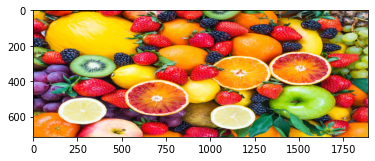

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()


#### 1.4 Xoay ảnh

(1427, 2100, 3)


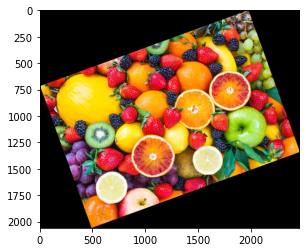

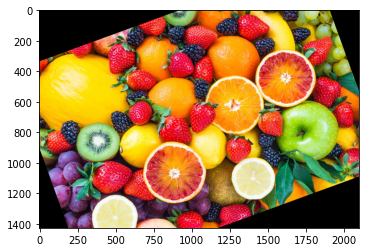

In [6]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()


#### 1.5 Dilation và Erosion

(309, 515)


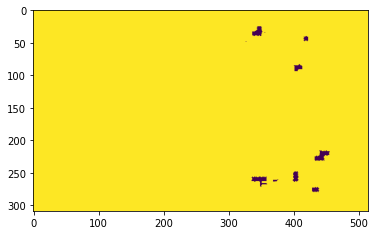

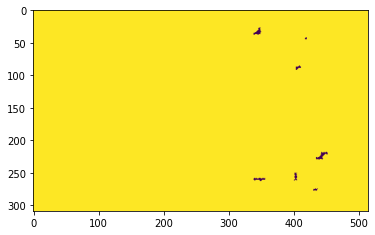

In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode ='F')
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()


#### 1.6 Coordinate Mapping

(309, 515)


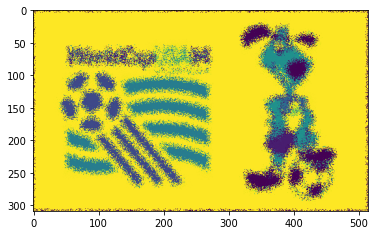

In [9]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode="F")
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5
q = 2 * d * np.random.rand(*M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()


#### 1.7 Biến đổi chung (Generic Transformation)

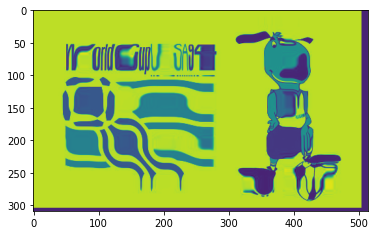

In [10]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode = "F")

d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()


## **<span style="color: RED;">2. BÀI TẬP</span>**

Bài 1: Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg

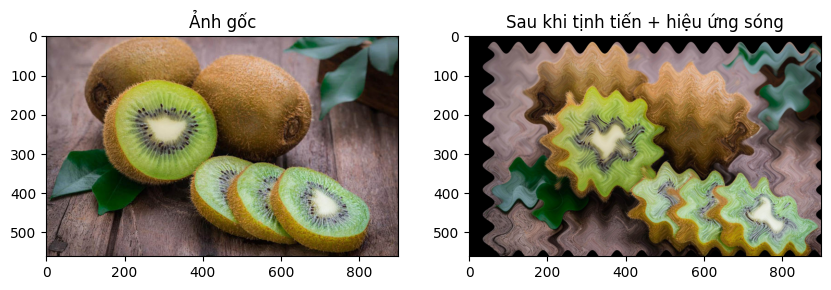

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates
import os

# Kiểm tra và đọc ảnh kiwi
img_path = 'kiwi.jpg'

# Kiểm tra xem file có tồn tại không
if not os.path.exists(img_path):
    print(f"LỖI: File '{img_path}' không tồn tại!")
    print("Hãy đảm bảo bạn có file ảnh kiwi.jpg trong thư mục hiện tại")
    exit()

# Đọc ảnh
img = cv2.imread(img_path)

# Kiểm tra xem ảnh có được đọc thành công không
if img is None:
    print(f"LỖI: Không thể đọc file '{img_path}'!")
    print("Nguyên nhân có thể do:")
    print("- Định dạng file không hỗ trợ")
    print("- File ảnh bị hỏng")
    print("- Đường dẫn không đúng")
    exit()

# Tịnh tiến ảnh 50 pixel sang phải, 30 pixel xuống dưới
M = np.float32([[1, 0, 50], [0, 1, 30]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# Áp dụng hiệu ứng sóng
rows, cols = shifted.shape[:2]
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Tham số hiệu ứng sóng (có thể điều chỉnh)
amplitude = 15  # Biên độ sóng (độ cong)
frequency = 0.1  # Tần số sóng (số lượn sóng)

# Tạo hiệu ứng uốn cong dạng sóng
map_x = x + amplitude * np.sin(frequency * y)
map_y = y + amplitude * np.cos(frequency * x)

# Chuyển đổi tọa độ
map_x = map_x.astype(np.float32)
map_y = map_y.astype(np.float32)

# Áp dụng hiệu ứng
wave_img = cv2.remap(shifted, map_x, map_y, cv2.INTER_LINEAR)

# Lưu và hiển thị kết quả
cv2.imwrite('kiwi_wave.jpg', wave_img)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Ảnh gốc')
plt.subplot(122), plt.imshow(cv2.cvtColor(wave_img, cv2.COLOR_BGR2RGB)), plt.title('Sau khi tịnh tiến + hiệu ứng sóng')
plt.show()

Bài 2:
Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

In [3]:
import cv2
import numpy as np
from PIL import Image

# Đọc ảnh đu đủ và dưa hấu
papaya = cv2.imread('dudu.png', cv2.IMREAD_UNCHANGED)   # [2]
watermelon = cv2.imread('duahau.png', cv2.IMREAD_UNCHANGED)   # [1]

# Nếu ảnh là 3 kênh, chuyển sang 4 kênh (RGBA)
def to_rgba(img):
    if img.shape[2] == 3:
        alpha = np.ones(img.shape[:2], dtype=np.uint8) * 255
        return np.dstack([img, alpha])
    return img

papaya = to_rgba(papaya)
watermelon = to_rgba(watermelon)

# Tạo gradient cho đu đủ: từ đỏ sang xanh lá
h_p, w_p = papaya.shape[:2]
gradient_papaya = np.zeros_like(papaya)
for i in range(h_p):
    ratio = i / h_p
    # Đỏ (255,0,0) sang xanh lá (0,255,0)
    r = int(255 * (1 - ratio))
    g = int(255 * ratio)
    b = 0
    gradient_papaya[i, :, :3] = [b, g, r]
    gradient_papaya[i, :, 3] = 255

# Tạo mask cho đu đủ (vùng nền trắng hoặc sáng sẽ thành trong suốt)
gray_papaya = cv2.cvtColor(papaya[:, :, :3], cv2.COLOR_BGR2GRAY)
mask_papaya = gray_papaya < 240
for c in range(3):
    papaya[:, :, c] = gradient_papaya[:, :, c] * mask_papaya + papaya[:, :, c] * (~mask_papaya)
papaya[:, :, 3] = mask_papaya.astype(np.uint8) * 255

# Tạo gradient cho dưa hấu: từ vàng sang tím
h_w, w_w = watermelon.shape[:2]
gradient_watermelon = np.zeros_like(watermelon)
for i in range(h_w):
    ratio = i / h_w
    # Vàng (0,255,255) sang tím (255,0,255)
    r = int(255 * ratio)
    g = int(255 * (1 - ratio))
    b = 255
    gradient_watermelon[i, :, :3] = [b, g, r]
    gradient_watermelon[i, :, 3] = 255

# Tạo mask cho dưa hấu (vùng nền trắng hoặc sáng sẽ thành trong suốt)
gray_watermelon = cv2.cvtColor(watermelon[:, :, :3], cv2.COLOR_BGR2GRAY)
mask_watermelon = gray_watermelon < 240
for c in range(3):
    watermelon[:, :, c] = gradient_watermelon[:, :, c] * mask_watermelon + watermelon[:, :, c] * (~mask_watermelon)
watermelon[:, :, 3] = mask_watermelon.astype(np.uint8) * 255

# Tạo nền trong suốt lớn đủ chứa cả hai quả
canvas_h = max(h_p, h_w)
canvas_w = w_p + w_w + 50  # khoảng cách giữa hai quả
canvas = np.zeros((canvas_h, canvas_w, 4), dtype=np.uint8)

# Ghép đu đủ vào bên trái
canvas[0:h_p, 0:w_p] = papaya

# Ghép dưa hấu vào bên phải
canvas[0:h_w, w_p+50:w_p+50+w_w] = watermelon

# Lưu kết quả dạng PNG với alpha channel
result = Image.fromarray(canvas)
result.save('dua_du_dua_hau_gradient.png')
print("Đã lưu ảnh kết quả: dua_du_dua_hau_gradient.png")


Đã lưu ảnh kết quả: dua_du_dua_hau_gradient.png


    Bài 3:
 Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

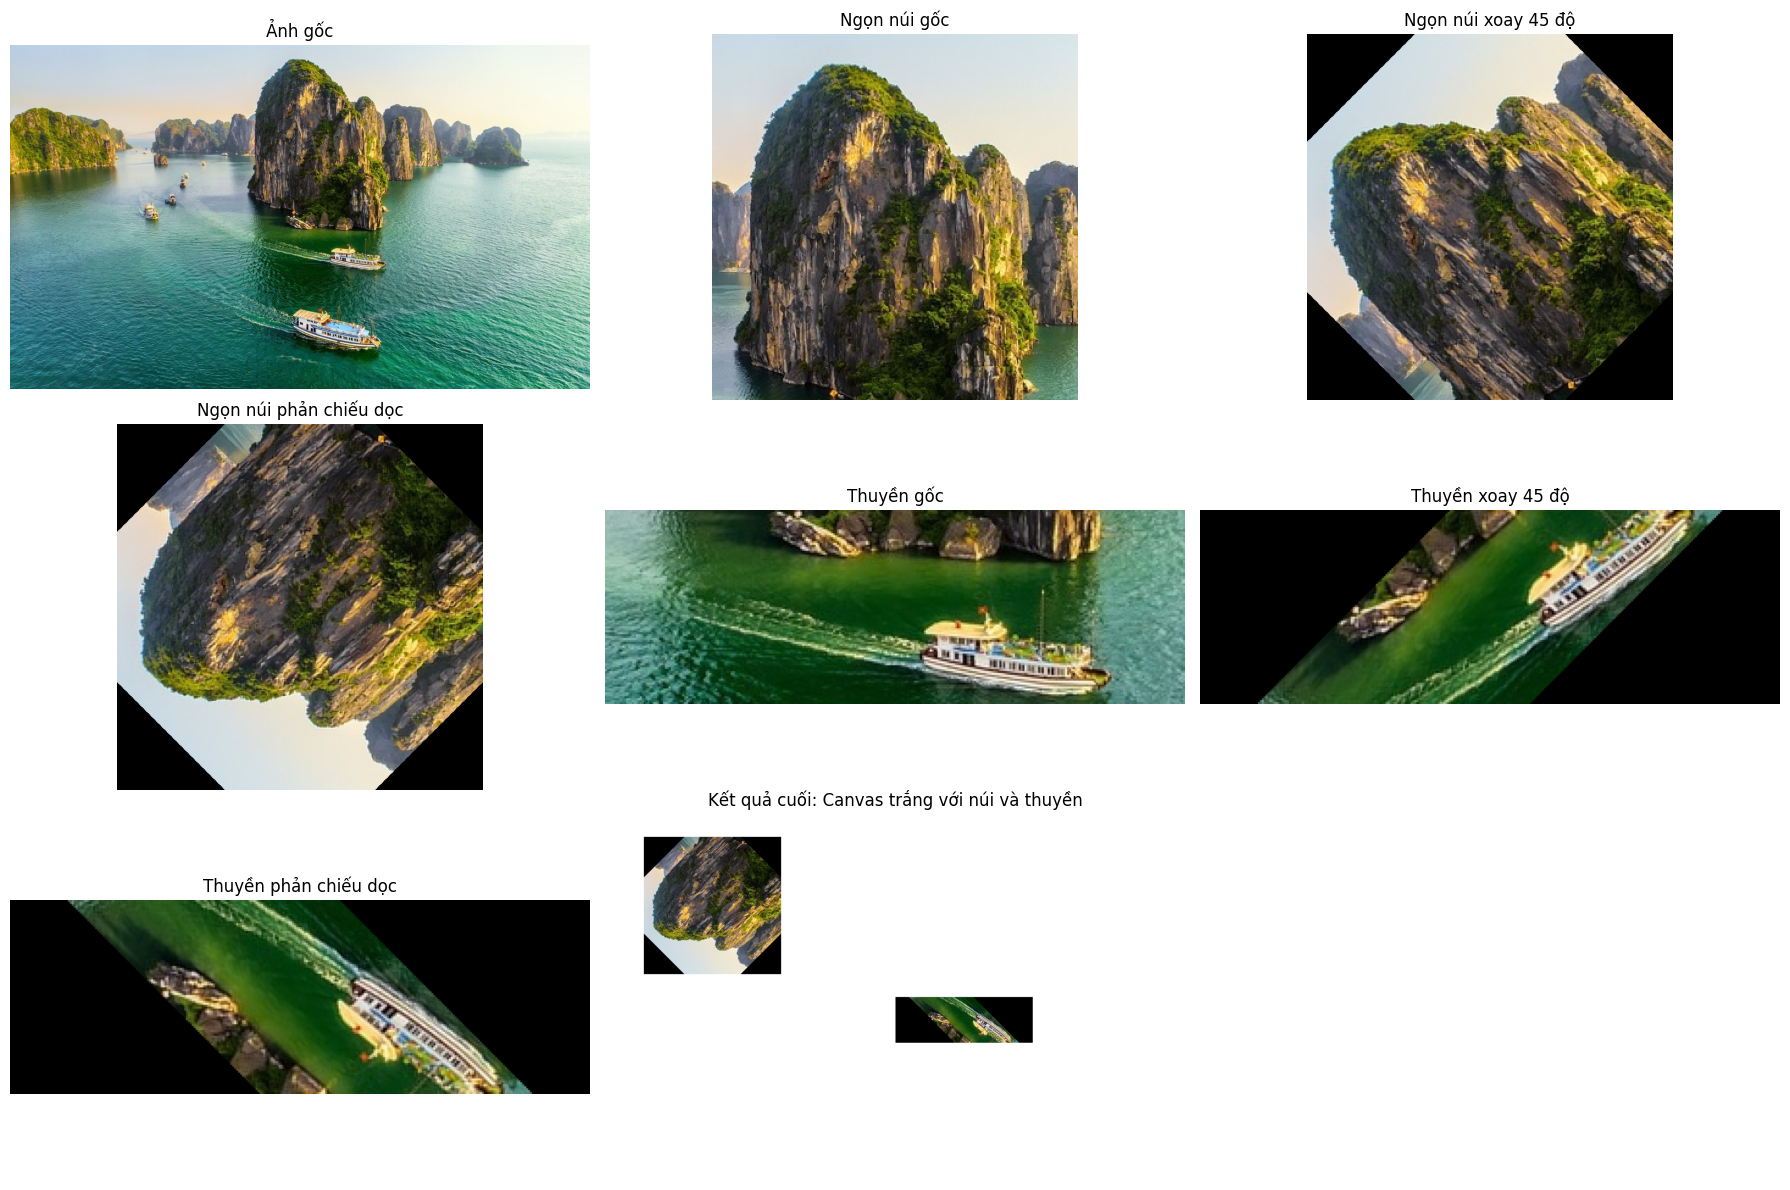

Đã lưu file 'mountain_boat_mirror.jpg' thành công!
Kích thước ngọn núi: (300, 300, 3)
Kích thước thuyền: (100, 300, 3)
Kích thước canvas: (800, 1200, 3)


In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = iio.imread('exercise/quang_ninh.jpg')

# Chọn vùng chứa ngọn núi và xoay (thu hẹp lại) - giữ nguyên tọa độ
mountain = img[0:300, 400:700]
mountain_rotated = nd.rotate(mountain, 45, reshape=False)  # reshape=False để giữ nguyên kích thước

# Chọn vùng chứa thuyền và xoay (di chuyển lên trên để tránh sóng nước) - giữ nguyên tọa độ
boat = img[300:400, 400:700]
boat_rotated = nd.rotate(boat, 45, reshape=False)  # reshape=False để giữ nguyên kích thước

# Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng
mountain_mirrored = np.flipud(mountain_rotated)  # flip theo trục dọc
boat_mirrored = np.flipud(boat_rotated)  # flip theo trục dọc

# Tạo canvas trắng để ghép các đối tượng
canvas_height = 800
canvas_width = 1200
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # Canvas trắng

# Ghép ngọn núi vào canvas (ở vị trí trên bên trái)
mountain_h, mountain_w = mountain_mirrored.shape[:2]
canvas[50:50+mountain_h, 50:50+mountain_w] = mountain_mirrored

# Ghép thuyền vào canvas (ở vị trí dưới bên phải)
boat_h, boat_w = boat_mirrored.shape[:2]
canvas[400:400+boat_h, 600:600+boat_w] = boat_mirrored

# Lưu kết quả
iio.imsave('mountain_boat_mirror.jpg', canvas)

# Hiển thị kết quả
plt.figure(figsize=(18, 12))

# Hiển thị ảnh gốc
plt.subplot(331)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')

# Hiển thị ngọn núi gốc
plt.subplot(332)
plt.imshow(mountain)
plt.title('Ngọn núi gốc')
plt.axis('off')

# Hiển thị ngọn núi sau xoay
plt.subplot(333)
plt.imshow(mountain_rotated)
plt.title('Ngọn núi xoay 45 độ')
plt.axis('off')

# Hiển thị ngọn núi sau phản chiếu
plt.subplot(334)
plt.imshow(mountain_mirrored)
plt.title('Ngọn núi phản chiếu dọc')
plt.axis('off')

# Hiển thị thuyền gốc
plt.subplot(335)
plt.imshow(boat)
plt.title('Thuyền gốc')
plt.axis('off')

# Hiển thị thuyền sau xoay
plt.subplot(336)
plt.imshow(boat_rotated)
plt.title('Thuyền xoay 45 độ')
plt.axis('off')

# Hiển thị thuyền sau phản chiếu
plt.subplot(337)
plt.imshow(boat_mirrored)
plt.title('Thuyền phản chiếu dọc')
plt.axis('off')

# Hiển thị kết quả cuối cùng
plt.subplot(338)
plt.imshow(canvas)
plt.title('Kết quả cuối: Canvas trắng với núi và thuyền')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Đã lưu file 'mountain_boat_mirror.jpg' thành công!")
print(f"Kích thước ngọn núi: {mountain_mirrored.shape}")
print(f"Kích thước thuyền: {boat_mirrored.shape}")
print(f"Kích thước canvas: {canvas.shape}")

    Bài 4: Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.

In [2]:
from PIL import Image, ImageOps
import numpy as np
import math
import os

# Complete code for barrel distortion with all necessary functions

class BarrelDeformer:
    def __init__(self, strength=0.3):
        self.strength = strength
        
    def transform(self, x, y):
        # Center and normalize coordinates
        nx = x - self.w / 2
        ny = y - self.h / 2
        
        # Calculate normalized radius
        r = math.sqrt(nx**2 + ny**2) / (min(self.w, self.h) / 2)
        
        if r == 0:
            return x, y
            
        # Apply barrel distortion formula: r_new = r * (1 + k * r^2)
        r_distorted = r * (1 + self.strength * r**2)
        
        # Scale back to original coordinates
        scale = r_distorted / r if r != 0 else 1
        dx = nx * scale
        dy = ny * scale
        
        return dx + self.w / 2, dy + self.h / 2
    
    def transform_rectangle(self, x0, y0, x1, y1):
        return (*self.transform(x0, y0),
                *self.transform(x0, y1),
                *self.transform(x1, y1),
                *self.transform(x1, y0))
    
    def getmesh(self, img):
        self.w, self.h = img.size
        
        # Create a grid of rectangles (20x20 pixels each)
        gridspace = 20
        target_grid = []
        
        for x in range(0, self.w, gridspace):
            for y in range(0, self.h, gridspace):
                # Ensure we don't go beyond image boundaries
                x1 = min(x + gridspace, self.w)
                y1 = min(y + gridspace, self.h)
                target_grid.append((x, y, x1, y1))
                
        # Transform each target rectangle to its source quadrilateral
        source_grid = [self.transform_rectangle(*rect) for rect in target_grid]
        
        # Return list of (target_rectangle, source_quadrilateral) pairs
        return list(zip(target_grid, source_grid))

def apply_barrel_warp(img, strength=0.3):
    """
    Apply barrel distortion to an image using PIL's ImageOps.deform
    
    Parameters:
    - img: PIL Image object
    - strength: Strength of the barrel distortion effect (0.1-0.5 is reasonable)
    
    Returns:
    - PIL Image with barrel distortion applied
    """
    # Create a deformer object with the specified strength
    deformer = BarrelDeformer(strength)
    
    # Apply the deformation
    return ImageOps.deform(img, deformer)

# Main function to process the pagoda image
def main():
    """
    Main function to process the pagoda image
    """
    print("Starting pagoda image processing...")
    
    # Input and output file paths
    input_path = 'exercise/pagoda.jpg'
    output_path = 'pagoda_warped.jpg'
    
    # Parameters
    scale_factor = 5
    distortion_strength = 0.3
    
    # Step 1: Load the pagoda image
    if os.path.exists(input_path):
        pagoda_img = Image.open(input_path)
        print(f"✅ Loaded original image: {pagoda_img.size} pixels")
        
        # Ensure RGB format
        if pagoda_img.mode != 'RGB':
            pagoda_img = pagoda_img.convert('RGB')
        
        # Step 2: Scale the image by 5x
        original_width, original_height = pagoda_img.size
        new_width = original_width * scale_factor
        new_height = original_height * scale_factor
        
        scaled_img = pagoda_img.resize((new_width, new_height), Image.LANCZOS)
        print(f"✅ Scaled {scale_factor}x to: {new_width} x {new_height} pixels")
        
        # Step 3: Apply barrel distortion
        print("🔄 Applying barrel distortion warping...")
        print("This may take a moment for the large image...")
        warped_img = apply_barrel_warp(scaled_img, strength=distortion_strength)
        print(f"✅ Applied barrel distortion warping with strength={distortion_strength}")
        
        # Step 4: Save the result
        warped_img.save(output_path, 'JPEG', quality=95, optimize=True)
        print(f"✅ Saved as {output_path}")
        
        # Verification
        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path)
            saved_img = Image.open(output_path)
            print(f"✅ Output verification: {saved_img.size} pixels, {file_size:,} bytes")
        else:
            print("❌ Error: Failed to save output file")
        
        print("\n" + "="*50)
        print("🎉 PAGODA PROCESSING COMPLETE!")
        print("="*50)
        print(f"📸 Original: {original_width} x {original_height} px")
        print(f"🔍 Scaled {scale_factor}x: {new_width} x {new_height} px") 
        print(f"🌊 Warping: Barrel distortion (strength={distortion_strength})")
        print(f"💾 Output: {output_path}")
        print("="*50)
    else:
        print(f"❌ Error: Input file {input_path} not found!")

# Execute the main function if this script is run directly
if __name__ == "__main__":
    main()


Starting pagoda image processing...
✅ Loaded original image: (600, 348) pixels
✅ Scaled 5x to: 3000 x 1740 pixels
🔄 Applying barrel distortion warping...
This may take a moment for the large image...
✅ Applied barrel distortion warping with strength=0.3
✅ Saved as pagoda_warped.jpg
✅ Output verification: (3000, 1740) pixels, 742,724 bytes

🎉 PAGODA PROCESSING COMPLETE!
📸 Original: 600 x 348 px
🔍 Scaled 5x: 3000 x 1740 px
🌊 Warping: Barrel distortion (strength=0.3)
💾 Output: pagoda_warped.jpg


    Bài 5: Viết chương trình tạo menu
    - Tịnh tiến
    - Xoay
    - Phóng to
    - Thu nhỏ
    - Coordinate Map
    Khi chọn phím T, X, P, H, C thì hỏi muốn thực hiện trên hình nào từ 3 hình trong thư mục exercise. Người dùng chọn hình nào thì thực hiện phép biến đổi trên hình đó.

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Danh sách các ảnh trong thư mục exercise
images = [
    'colorful-ripe-tropical-fruits.jpg',
    'quang_ninh.jpg',
    'pagoda.jpg'
]

# Hiển thị danh sách ảnh
print('Danh sách ảnh:')
for i, img_name in enumerate(images, 1):
    print(f'{i} - {img_name}')

# Hiển thị 3 ảnh gốc
plt.figure(figsize=(15, 5))
for i, img_name in enumerate(images, 1):
    plt.subplot(1, 3, i)
    img = iio.imread('exercise/' + img_name)
    plt.imshow(img)
    plt.title(f'{i} - {img_name}')
plt.tight_layout()
plt.show()

while True:
    print('\nMenu:')
    print('T - Tịnh tiến')
    print('X - Xoay')
    print('P - Phóng to')
    print('H - Thu nhỏ')
    print('C - Coordinate Map')
    print('Q - Thoát')
    
    choice = input('Chọn chức năng (T/X/P/H/C/Q): ').upper()
    
    if choice == 'Q':
        break
        
    if choice in ['T', 'X', 'P', 'H', 'C']:
        img_choice = int(input('Chọn số tương ứng với ảnh (1/2/3): '))
        if 1 <= img_choice <= 3:
            # Đọc ảnh được chọn
            img = iio.imread('exercise/' + images[img_choice-1])
            
            if choice == 'T':  # Tịnh tiến
                dx = int(input('Nhập số pixel dịch chuyển theo chiều ngang: '))
                dy = int(input('Nhập số pixel dịch chuyển theo chiều dọc: '))
                result = nd.shift(img, (dy, dx, 0))
                
            elif choice == 'X':  # Xoay
                angle = float(input('Nhập góc xoay (độ): '))
                result = nd.rotate(img, angle)
                
            elif choice == 'P':  # Phóng to
                scale = float(input('Nhập tỷ lệ phóng to (>1): '))
                result = nd.zoom(img, (scale, scale, 1))
                
            elif choice == 'H':  # Thu nhỏ
                scale = float(input('Nhập tỷ lệ thu nhỏ (0-1): '))
                result = nd.zoom(img, (scale, scale, 1))
                
            else:  # Coordinate Map
                d = 5
                V, H = img.shape[:2]
                coords = np.mgrid[0:V, 0:H]
                
                # Tạo hiệu ứng biến dạng ngẫu nhiên
                coords[0] = coords[0] + np.random.uniform(-d, d, (V, H))
                coords[1] = coords[1] + np.random.uniform(-d, d, (V, H))
                
                # Áp dụng biến đổi cho từng kênh màu
                result = np.zeros_like(img)
                for i in range(3):  # 3 kênh RGB
                    result[:,:,i] = nd.map_coordinates(img[:,:,i], coords)
            
            # Hiển thị kết quả
            plt.figure(figsize=(12, 5))
            plt.subplot(121)
            plt.imshow(img)
            plt.title('Ảnh gốc')
            
            plt.subplot(122)
            plt.imshow(result)
            plt.title('Kết quả')
            
            plt.show()
        else:
            print('Lựa chọn không hợp lệ!')
    else:
        print('Lựa chọn không hợp lệ!')
